In [2]:
#loaded the required libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import (RandomOverSampler)

Using TensorFlow backend.


In [3]:
os.getcwd()

'/Users/arvindpawar'

In [4]:
#path/
os.chdir(r'/Users/arvindpawar/Desktop/Fourth Quarter/XN Updated') 

In [ ]:
#loading indicator pairs data
indicatorData=pd.read_csv('indicator_pairs_data updated.csv')

In [ ]:
indicatorData['alert_type'].value_counts()

In [ ]:
#selecting daily heat data only
indicatorData.loc[indicatorData['alert_type'] == 'Daily_Heat'].reset_index()

In [ ]:
#selecting daily heat data only
indicatorData=indicatorData.loc[indicatorData['alert_type'] == 'Daily_Heat'].reset_index()

In [ ]:
#shape of the atomic data
indicatorData.shape

In [ ]:
indicatorData['classification'].value_counts()

In [ ]:
employeeData=pd.read_csv('obfuscated_demo_data2.csv')

In [ ]:
employeeData.head()

In [ ]:
employeeData['person_status'].unique()

In [ ]:
employeeData=employeeData.drop_duplicates(subset ="employee_id")

In [ ]:
employeeData.shape

In [ ]:
employeeData['Year']=pd.DatetimeIndex(employeeData['ge_hire_date']).year

In [ ]:
employeeData.isnull().sum()

In [ ]:
employeeData['tenure']=(2020-employeeData['Year'])

In [ ]:
empdummydata=pd.get_dummies(employeeData, columns=['career_band', 'job_function'])

In [ ]:
empdummydata=empdummydata.iloc[:, np.r_[0,10:47]]

In [ ]:
empdummydata.head()

In [ ]:
testset=empdummydata[empdummydata['tenure'].isnull()]

In [ ]:
trainset=empdummydata[~empdummydata['tenure'].isnull()]

In [ ]:
trainset.head()

In [ ]:
testset.head()

In [ ]:
X=trainset.iloc[:, 2:]

In [ ]:
# X=trainset.iloc[:, 2:]
Y=trainset.iloc[:, 1]
# regressor=DecisionTreeRegressor(random_state=0)
# regressor.fit(X,Y)
# testset_pred=testset.iloc[:,2:]
# tenure_predict=regressor.predict(testset_pred)
# testset=testset.reset_index()
# testset=testset.drop(['index'], axis=1)
# testset['tenure_pred']=pd.DataFrame({"tenure_pred":tenure_predict})
# testset=testset.drop(['tenure'], axis=1)
# employeeData.loc[employeeData.employee_id.isin(testset.employee_id),'tenure'] = employeeData.employee_id.map(testset.set_index('employee_id').tenure_pred)

In [ ]:
regressor=DecisionTreeRegressor(random_state=0)

In [ ]:
regressor.fit(X,Y)

In [ ]:
testset_pred=testset.iloc[:,2:]

In [ ]:
tenure_predict=regressor.predict(testset_pred)

In [ ]:
testset=testset.reset_index()

In [ ]:
testset=testset.drop(['index'], axis=1)

In [ ]:
testset['tenure_pred']=pd.DataFrame({"tenure_pred":tenure_predict})

In [ ]:
testset=testset.drop(['tenure'], axis=1)

In [ ]:
employeeData.loc[employeeData.employee_id.isin(testset.employee_id),'tenure'] = employeeData.employee_id.map(testset.set_index('employee_id').tenure_pred)

In [ ]:
employeeData.isnull().sum()

In [ ]:
newdata = indicatorData.merge(employeeData,
                             left_on = 'employee_id',
                             right_on = 'employee_id',
                             how = 'left')

In [ ]:
newdata.isnull().sum()

In [ ]:
newdata['classification'].value_counts()

In [ ]:
newdata["owner_name"].fillna("None", inplace = True) 

In [ ]:
newdata["country_name"].fillna("None", inplace = True) 

In [ ]:
newdata.isnull().sum()

In [ ]:
newdata.shape

In [ ]:
newdata['classification'].value_counts()

In [ ]:
from pandas import Series

In [ ]:
s=newdata['indicator_pairs'].str.split('/').apply(Series, 1).stack()

In [ ]:
s.index=s.index.droplevel(-1)

In [ ]:
s.name='indicators'

In [ ]:
newdata_fin_s=newdata.join(s)

In [ ]:
newdata_fin_s.shape

In [ ]:
d=newdata_fin_s.duplicated(subset=None, keep='last')

In [ ]:
d.value_counts()

In [ ]:
newdata_fin_s.drop_duplicates(keep='last', inplace=True)

In [ ]:
newdata_fin_s.to_csv(r'/Users/arvindpawar/Desktop/XN Updated/new_fin_s_nipa_updated.csv')

In [ ]:
newdata_fin_s.shape

In [ ]:
newdata_fin_s['classification'].value_counts()

In [ ]:
newdata1 = newdata_fin_s.drop(['alert_escalation_date','insert_date','alert_category','alert_type'
                               ,'person_status','ge_hire_date','city','state_name',
                         'function_group', 'alert_id_fk', 'avg_score', 'Year', 
                               'person_type', 'country_name', 'industry_focus_name'
                               ], axis=1)

In [ ]:
newdata_fin_dummy=pd.get_dummies(newdata1, columns=['owner_name','classification','hru','job_function','indicators',
                                                       'career_band'
                                                    ])

In [ ]:
newdata_fin_dummy_backup=newdata_fin_dummy.copy()

In [143]:
newdata_final_avi = newdata_fin_dummy.drop(['employee_id', 'indicator_pairs'], axis=1)

In [144]:
newdata_final_avi=newdata_final_avi.drop(['index'], axis=1)

In [145]:
newdata_final_avi.head()

,score,risk_factor,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_None,...,indicators_Top_Users_Heat_USB_IND,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,1.74,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,1.71,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,3.21,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,3.12,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,3.00,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [146]:
from sklearn.cluster import KMeans

In [147]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(newdata_final_avi)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

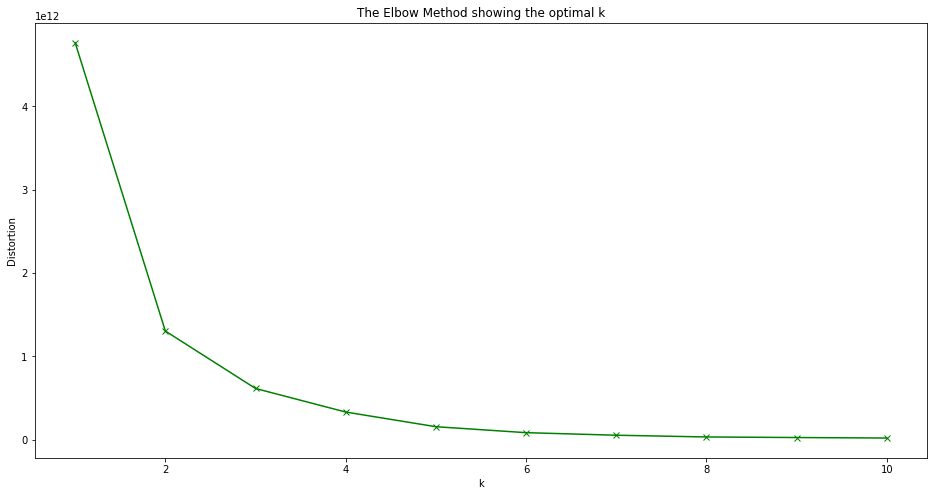

In [148]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', color='green')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [149]:
# from sklearn.metrics import silhouette_score
# range_n_clusters = list (range(3,10))
# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters)
#     preds = clusterer.fit_predict(newdata_final_avi)
#     centers = clusterer.cluster_centers_

#     score = silhouette_score(newdata_final_avi, preds)
#     print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

In [150]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [151]:
clusters = kmeans.fit_predict(newdata_final_avi)

In [152]:
print(clusters)

[0 0 0 ... 0 0 0]


In [153]:
newdata_fin_dummy=newdata_fin_dummy.drop(['index', 'employee_id'], axis=1)

In [154]:
newdata_fin_dummy

,score,risk_factor,indicator_pairs,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,...,indicators_Top_Users_Heat_USB_IND,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,1.74,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,1.71,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,3.21,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,3.12,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,3.00,App_1_Heat_Box_PRE_2016_Q3,22.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,216,2.16,App_9_Heat_Email_IND/Threshold_Heat_Email_IND,4.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16377,216,2.16,App_9_Heat_Email_IND/Threshold_Heat_Email_IND,4.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16378,198,1.98,App_3_Heat_Email_ZIP/App_9_Heat_Email_IND/Thre...,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16378,198,1.98,App_3_Heat_Email_ZIP/App_9_Heat_Email_IND/Thre...,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [155]:
newdata_fin_dummy= newdata_fin_dummy.reset_index()
df= pd.DataFrame(clusters)
df.columns = ['cluster_pred']
df1_avi= pd.concat([newdata_fin_dummy, df], axis = 1).reset_index()

In [156]:
# df1_avi.head()

In [157]:
# df1_avi.iloc[:, 7:]

In [158]:
gb = df1_avi.groupby(['cluster_pred']).sum()

In [160]:
gb

,level_0,index,score,risk_factor,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,indicators_Top_Users_Heat_USB_IND,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
cluster_pred,,,,,,,,,,,,,,,,,,,,,
0,669083549,311790444,24422516,147227.316361,355080.027027,1998.0,80.0,5740.0,5688.0,11326.0,...,1618.0,4258.0,9202.0,365.0,1873.0,7755.0,109.0,7368.0,2407.0,2697.0
1,435666,217346,9885610,512.145412,700.000000,0.0,0.0,0.0,0.0,28.0,...,4.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2861716,1316825,9192567,1692.078727,1478.000000,0.0,0.0,12.0,20.0,81.0,...,24.0,24.0,81.0,0.0,0.0,18.0,0.0,6.0,0.0,0.0
3,31437990,14428017,22536990,25125.775747,30368.000000,0.0,0.0,15.0,284.0,629.0,...,252.0,169.0,376.0,436.0,0.0,174.0,6.0,138.0,0.0,29.0


In [159]:
gb[['classification_TP/HIGH', 'classification_TP/LOW', 'classification_TP/DE', 'classification_FP']]

,classification_TP/HIGH,classification_TP/LOW,classification_TP/DE,classification_FP
cluster_pred,,,,
0,1239.0,2977.0,28104.0,3714.0
1,0.0,0.0,28.0,0.0
2,6.0,38.0,85.0,0.0
3,127.0,265.0,860.0,76.0


In [465]:
gb.to_csv(r'//Users/arvindpawar/Desktop/Automic ss/updated_Daily_avi_4.csv')

In [83]:
##TP/HIGH is 1 and rest are 0 - predictive analytics

In [336]:
#random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')
newdata_rf_dummy=pd.get_dummies(newdata1, columns=['owner_name','hru','indicators',
                                                    'job_function','career_band'
                                                       ])

newdata_rf_dummy=newdata_rf_dummy.drop(['indicator_pairs'], axis=1)
newdata_rf_dummy['classification'].replace({"FP":"0", "TP/DE":"1", "TP/LOW":"2", "TP/HIGH":"3"}, inplace=True)
newdata_rf_dummy=newdata_rf_dummy.drop(['index'], axis=1)

#Creating the dependent variable class
factor = pd.factorize(newdata_rf_dummy['classification'])
newdata_rf_dummy.classification = factor[0]
definitions = factor[1]
print(newdata_rf_dummy.classification.head())
print(definitions)

Libraries Imported
0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Index(['1', '2', '3', '0'], dtype='object')


In [337]:
#newdata_rf_dummy=newdata_rf_dummy.drop(['index'], axis=1)

In [338]:
tpHighDf=newdata_rf_dummy.copy()

In [339]:
tpHighDf['classification'].unique()

array([0, 1, 2, 3])

In [340]:
tpHighDf['classification'] = (tpHighDf['classification'] == 3).astype(int)

In [341]:
tpHighDf['classification'].value_counts()

0    33729
1     3790
Name: classification, dtype: int64

In [342]:
tpHighDf.shape

(37519, 144)

In [343]:
#Decision Tree TP/HIGH = 1 and rest are 0

In [344]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
from sklearn import metrics

In [231]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,job_function_JOB_FUNCTION_8,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,19616361638,1.74,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,19616361638,1.71,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,19616361638,3.21,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,19616361638,3.12,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,19616361638,3.00,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [232]:
tpHighDf.iloc[:, np.r_[0, 2, 4:144]]

,score,risk_factor,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,owner_name_Analyst_8,owner_name_None,...,job_function_JOB_FUNCTION_8,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,1.74,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,1.71,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,3.21,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,3.12,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,3.00,22.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,216,2.16,4.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16377,216,2.16,4.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16378,198,1.98,4.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16378,198,1.98,4.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [233]:
X=tpHighDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighDf.iloc[:, 3]

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [235]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [236]:
clf=DecisionTreeClassifier()

In [237]:
clf=clf.fit(X_rs, y_rs)

In [238]:
y_pred=clf.predict(X_test)

In [239]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9788557213930348


In [240]:
print("Decision Tree for High Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree for High Risk
Predicted Observation      0     1
Actual Observation                
0                      10016   120
1                        118  1002
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10136
           1       0.89      0.89      0.89      1120

    accuracy                           0.98     11256
   macro avg       0.94      0.94      0.94     11256
weighted avg       0.98      0.98      0.98     11256


Accuracy: 0.9788557213930348


In [241]:
confusion_matrix(y_test, y_pred)

array([[10016,   120],
       [  118,  1002]])

In [242]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10136
           1       0.89      0.89      0.89      1120

    accuracy                           0.98     11256
   macro avg       0.94      0.94      0.94     11256
weighted avg       0.98      0.98      0.98     11256



In [346]:
#random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


In [347]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,job_function_JOB_FUNCTION_8,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,19616361638,1.74,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,19616361638,1.71,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,19616361638,3.21,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,19616361638,3.12,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,19616361638,3.00,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [348]:
#Creating the dependent variable class (factorization)
factor = pd.factorize(tpHighDf['classification'])
tpHighDf.classification = factor[0]
definitions = factor[1]
print(tpHighDf.classification.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [349]:
X=tpHighDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighDf.iloc[:, 3]

In [350]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 21)

In [351]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [352]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [353]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_rs, y_rs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [354]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [355]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [356]:
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(4),definitions))


In [357]:
y_test = np.vectorize(reversefactor.get)(y_test)


In [358]:
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print("Random Forest for High Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest for High Risk
Predicted Observation     0     1
Actual Observation               
0                      9980   142
1                        93  1041
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10122
           1       0.88      0.92      0.90      1134

    accuracy                           0.98     11256
   macro avg       0.94      0.95      0.94     11256
weighted avg       0.98      0.98      0.98     11256


Accuracy: 0.9791222459132907


In [359]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9791222459132907


In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10122
           1       0.88      0.92      0.90      1134

    accuracy                           0.98     11256
   macro avg       0.94      0.95      0.94     11256
weighted avg       0.98      0.98      0.98     11256



In [258]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

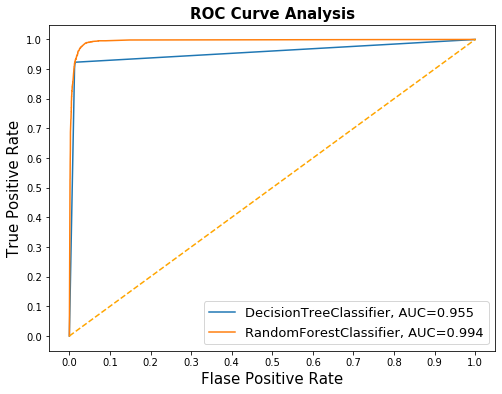

In [259]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [260]:
#TP/HIGH and TP/LOW 1 and rest 0 #DT

In [261]:
tpHighNewDf=newdata_rf_dummy.copy()

In [262]:
tpHighNewDf['classification'].unique()

array([0, 1, 2, 3])

In [263]:
tpHighNewDf['classification'].replace({0:0, 1:0, 2:1, 3:1}, inplace=True)

In [264]:
tpHighNewDf['classification'].value_counts()

0    32357
1     5162
Name: classification, dtype: int64

In [265]:
X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighNewDf.iloc[:, 3]

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [267]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [268]:
clf=DecisionTreeClassifier()

In [269]:
clf=clf.fit(X_rs, y_rs)

In [270]:
y_pred=clf.predict(X_test)

In [271]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9346126510305615


In [272]:
print("Decision Tree for Notable Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Decision Tree for Notable Risk
Predicted Observation     0     1
Actual Observation               
0                      9283   439
1                       297  1237
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9722
           1       0.74      0.81      0.77      1534

    accuracy                           0.93     11256
   macro avg       0.85      0.88      0.87     11256
weighted avg       0.94      0.93      0.94     11256


Accuracy: 0.9346126510305615


In [366]:
#RB 
#Creating the dependent variable class
factor = pd.factorize(tpHighNewDf['classification'])
tpHighNewDf.classification = factor[0]
definitions = factor[1]
print(tpHighNewDf.classification.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [367]:
X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighNewDf.iloc[:, 3]

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=21)

In [369]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [370]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [371]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_rs, y_rs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [372]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [373]:
print("Random Forest for Notable Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest for Notable Risk
Predicted Observation     0     1
Actual Observation               
0                      9211   498
1                       298  1249
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9709
           1       0.71      0.81      0.76      1547

    accuracy                           0.93     11256
   macro avg       0.84      0.88      0.86     11256
weighted avg       0.93      0.93      0.93     11256


Accuracy: 0.9292821606254442


In [374]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9292821606254442


In [375]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9709
           1       0.71      0.81      0.76      1547

    accuracy                           0.93     11256
   macro avg       0.84      0.88      0.86     11256
weighted avg       0.93      0.93      0.93     11256



In [376]:
y_test.shape

(11256,)

In [377]:
y_pred.shape

(11256,)

In [378]:
#TP/HIGH and TP/LOW are 0 and rest are set to 1

In [379]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

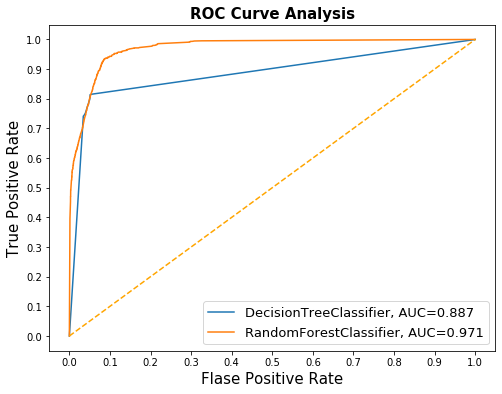

In [380]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [381]:
threshold = 0.4

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = metrics.accuracy_score(y_test, predicted)

In [382]:
print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted Observation     0     1
Actual Observation               
0                      9099   610
1                       221  1326
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9709
           1       0.71      0.81      0.76      1547

    accuracy                           0.93     11256
   macro avg       0.84      0.88      0.86     11256
weighted avg       0.93      0.93      0.93     11256


Accuracy: 0.9292821606254442


In [383]:
threshold = 0.3

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = metrics.accuracy_score(y_test, predicted)


In [384]:
print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted Observation     0     1
Actual Observation               
0                      9009   700
1                       171  1376
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9709
           1       0.71      0.81      0.76      1547

    accuracy                           0.93     11256
   macro avg       0.84      0.88      0.86     11256
weighted avg       0.93      0.93      0.93     11256


Accuracy: 0.9292821606254442


In [385]:
threshold = 0.124

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = metrics.accuracy_score(y_test, predicted)


In [386]:
print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted Observation     0     1
Actual Observation               
0                      8811   898
1                       101  1446
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9709
           1       0.71      0.81      0.76      1547

    accuracy                           0.93     11256
   macro avg       0.84      0.88      0.86     11256
weighted avg       0.93      0.93      0.93     11256


Accuracy: 0.9292821606254442


In [387]:
threshold = 0.05

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = metrics.accuracy_score(y_test, predicted)


In [388]:
print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted Observation     0     1
Actual Observation               
0                      8288  1421
1                        61  1486
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9709
           1       0.71      0.81      0.76      1547

    accuracy                           0.93     11256
   macro avg       0.84      0.88      0.86     11256
weighted avg       0.93      0.93      0.93     11256


Accuracy: 0.9292821606254442


In [219]:
#SVM

In [220]:
import sys
!{sys.executable} -m pip install cvxopt

In [221]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

svc = LinearSVC()

/Users/arvindpawar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [222]:
# #Creating the dependent variable class
# factor = pd.factorize(tpHighDf['classification'])
# tpHighDf.classification = factor[0]
# definitions = factor[1]
# print(tpHighDf.classification.head())
# print(definitions)

# X = tpHighDf.iloc[:, np.r_[2:80]].values
# Y = tpHighDf.iloc[:,1].values

In [223]:
#Creating the dependent variable class
factor = pd.factorize(tpHighNewDf['classification'])
tpHighNewDf.classification = factor[0]
definitions = factor[1]
print(tpHighNewDf.classification.head())
print(definitions)

X = tpHighNewDf.iloc[:, np.r_[2:80]].values
Y = tpHighNewDf.iloc[:,1].values

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=21)

In [225]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [226]:
svc = LinearSVC()


In [ ]:
# print("Performance measures of SVM for Notable Risk", sep=('\n'))
# print(pd.crosstab(y_test, predicted, rownames=['Actual Observation'], colnames=['Predicted Observation']))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))
# print("")
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
# accuracy = metrics.accuracy_score(y_test, predicted)
# accuracy

In [144]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
newdataframe=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]].copy()

In [147]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=newdataframe.columns).sort_values(ascending=False)
feature_imp

score                                        1.552357e-01
risk_factor                                  1.408603e-01
owner_name_Senior_Analyst_1                  1.045323e-01
owner_name_Senior_Analyst_2                  8.075336e-02
tenure                                       7.814932e-02
                                                 ...     
indicators_App_9_Heat_RDP_IND                3.226162e-07
indicators_App_3_Heat_Email_HRO              2.519562e-07
job_function_JOB_FUNCTION_2                  1.629955e-07
indicators_App_1_Heat_CD_Burn_PRE_2016_Q3    9.182314e-08
job_function_JOB_FUNCTION_4                  7.327550e-08
Length: 142, dtype: float64

In [148]:
feature_imp=feature_imp.nlargest(20)

No handles with labels found to put in legend.


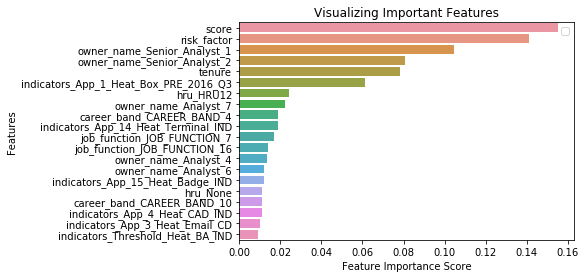

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [313]:
#Gradient Boosting

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [314]:
tpHighDf.head()

,score,employee_id,risk_factor,classification,tenure,owner_name_Analyst_1,owner_name_Analyst_3,owner_name_Analyst_4,owner_name_Analyst_6,owner_name_Analyst_7,...,job_function_JOB_FUNCTION_8,career_band_CAREER_BAND_1,career_band_CAREER_BAND_10,career_band_CAREER_BAND_2,career_band_CAREER_BAND_3,career_band_CAREER_BAND_4,career_band_CAREER_BAND_5,career_band_CAREER_BAND_6,career_band_CAREER_BAND_7,career_band_CAREER_BAND_8
0,174,19616361638,1.74,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,171,19616361638,1.71,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,321,19616361638,3.21,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,312,19616361638,3.12,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,300,19616361638,3.00,0,22.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [315]:
tpHighNewDf['classification'].value_counts()

0    32357
1     5162
Name: classification, dtype: int64

In [316]:
#Creating the dependent variable class
factor = pd.factorize(tpHighDf['classification'])
tpHighDf.classification = factor[0]
definitions = factor[1]
print(tpHighDf.classification.head())
print(definitions)

X=tpHighDf.iloc[:, np.r_[0, 2, 4:144]]
Y=tpHighDf.iloc[:, 3]

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64
Int64Index([0, 1], dtype='int64')


In [317]:
# #Creating the dependent variable class
# factor = pd.factorize(tpHighNewDf['classification'])
# tpHighNewDf.classification = factor[0]
# definitions = factor[1]
# print(tpHighNewDf.classification.head())
# print(definitions)

# X=tpHighNewDf.iloc[:, np.r_[0, 2, 4:144]]
# Y=tpHighNewDf.iloc[:, 3]


In [318]:
print(X.shape)

print(Y.shape)

(37519, 142)
(37519,)


In [319]:
import sys
!{sys.executable} -m pip install imblearn

In [320]:
from imblearn.over_sampling import (RandomOverSampler)

In [321]:
import scipy

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [323]:
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [324]:
model=GradientBoostingClassifier()

In [325]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
16377    0
16377    0
16378    0
16378    0
16378    0
Name: classification, Length: 37519, dtype: int64

In [326]:
model.fit(X_rs, y_rs)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [327]:
y_pred=model.predict(X_test)

In [328]:
print(confusion_matrix(y_test, y_pred))

[[9322  778]
 [  15 1141]]


In [335]:
print("Gradient Boosting for High Risk", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], 
                  colnames=['Predicted Observation']))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Gradient Boosting for High Risk
Predicted Observation     0     1
Actual Observation               
0                      9322   778
1                        15  1141
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10100
           1       0.59      0.99      0.74      1156

    accuracy                           0.93     11256
   macro avg       0.80      0.95      0.85     11256
weighted avg       0.96      0.93      0.94     11256


Accuracy: 0.9295486851457001


In [330]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9549972592414951

In [331]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9295486851457001


In [332]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10100
           1       0.59      0.99      0.74      1156

    accuracy                           0.93     11256
   macro avg       0.80      0.95      0.85     11256
weighted avg       0.96      0.93      0.94     11256



In [333]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              GradientBoostingClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_rs, y_rs)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

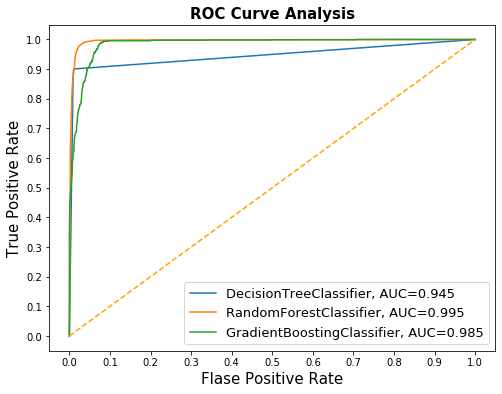

In [334]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

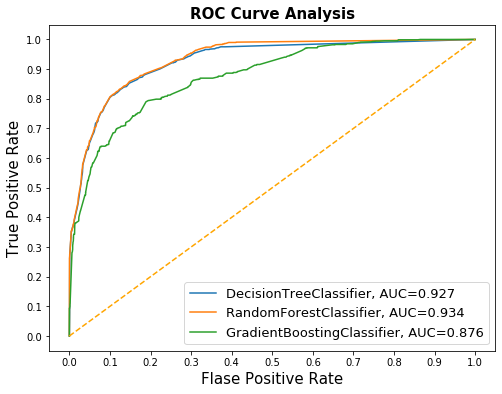

In [2083]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              GradientBoostingClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()